 Import Required Libraries

In [129]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder


from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

import joblib


 Load Dataset and Preview Dataset

In [111]:
df=pd.read_csv('House Price Prediction.csv')
df.head()

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1,1372,5,4,3,1969,Downtown,Excellent,No,159416.820518
1,2,4296,5,4,3,1959,Downtown,Excellent,No,430117.084577
2,3,3592,2,2,3,1939,Downtown,Good,No,264434.155227
3,4,968,4,2,2,1901,Suburban,Fair,Yes,249515.451163
4,5,4895,1,4,2,1975,Downtown,Fair,Yes,642570.724025


 Check Missing Values

In [112]:
df.isnull().sum()

Id           0
Area         0
Bedrooms     0
Bathrooms    0
Floors       0
YearBuilt    0
Location     0
Condition    0
Garage       0
Price        0
dtype: int64

Check Duplicates Values

In [113]:
df.duplicated().sum()

np.int64(0)

Dataset Information

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Id         10000 non-null  int64  
 1   Area       10000 non-null  int64  
 2   Bedrooms   10000 non-null  int64  
 3   Bathrooms  10000 non-null  int64  
 4   Floors     10000 non-null  int64  
 5   YearBuilt  10000 non-null  int64  
 6   Location   10000 non-null  object 
 7   Condition  10000 non-null  object 
 8   Garage     10000 non-null  object 
 9   Price      10000 non-null  float64
dtypes: float64(1), int64(6), object(3)
memory usage: 781.4+ KB


Remove Unnecessary Column

In [115]:
df.drop(columns=['Id'], inplace=True)

Dataset Shape

In [116]:
df.shape


(10000, 9)

 Unique Feature Values

In [117]:
for i in df.columns:
    print(f"{i}: {df[i].unique()}")
    print('-----------------------------------')

Area: [1372 4296 3592 ...  936 4826 4048]
-----------------------------------
Bedrooms: [5 2 4 1 3]
-----------------------------------
Bathrooms: [4 2 1 3]
-----------------------------------
Floors: [3 2 1]
-----------------------------------
YearBuilt: [1969 1959 1939 1901 1975 1906 1949 1925 1931 1999 1948 1978 1902 2004
 1971 1930 1903 1919 2013 2016 1935 1926 1976 1960 1954 1933 2010 1953
 2021 1988 1956 1983 1964 1968 1951 1920 1987 2007 2008 2014 1950 1981
 1917 1921 1965 2000 1943 2002 1946 1938 1929 1989 1984 1916 1979 1932
 1972 1994 1977 2009 1913 1995 1998 1957 2015 1940 2023 1982 1915 1910
 1928 1905 1912 2018 1997 2020 2006 1973 1942 1980 1944 2005 1908 1961
 1923 1941 1993 2012 2001 1974 1945 1967 1996 1990 1952 1936 1966 1927
 1924 1900 1962 1934 1955 1907 2017 1947 1909 1918 2003 1958 2024 2011
 1922 1991 1914 1985 1911 2019 1937 1963 1970 2022 1904 1992 1986 2025
 1899]
-----------------------------------
Location: ['Downtown' 'Suburban' 'Urban' 'Rural']
------------

 Feature Value Counts

In [118]:
for i in df.columns:
    print(f"{i}: {df[i].value_counts()}")
    print('-----------------------------------')

Area: Area
5000    43
4652    10
4143     9
1468     9
1409     9
        ..
1682     1
1828     1
1516     1
1133     1
4856     1
Name: count, Length: 3989, dtype: int64
-----------------------------------
Bedrooms: Bedrooms
1    2090
3    2030
4    2025
5    2015
2    1840
Name: count, dtype: int64
-----------------------------------
Bathrooms: Bathrooms
3    2620
4    2605
2    2470
1    2305
Name: count, dtype: int64
-----------------------------------
Floors: Floors
2    3455
1    3305
3    3240
Name: count, dtype: int64
-----------------------------------
YearBuilt: YearBuilt
2003    111
2005    107
2014    106
2006    105
1923    105
       ... 
1963     51
2023     43
2024     23
1899     12
2025      1
Name: count, Length: 127, dtype: int64
-----------------------------------
Location: Location
Downtown    2790
Urban       2425
Suburban    2415
Rural       2370
Name: count, dtype: int64
-----------------------------------
Condition: Condition
Fair         2605
Excellent    25

Price Distribution 

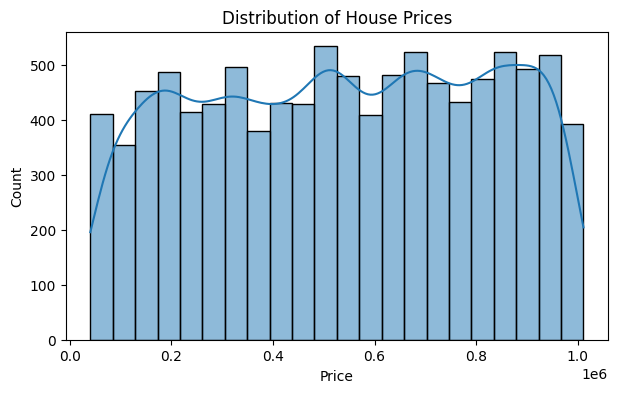

In [119]:
plt.figure(figsize=(7,4))
sns.histplot(df["Price"], kde=True)
plt.title("Distribution of House Prices")
plt.xlabel("Price")
plt.ylabel("Count")
plt.show()


Correlation Matrix

In [120]:
corr_matrix = df.corr(numeric_only=True) 
corr_matrix

,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Price
Area,1.000000,0.047377,0.021777,0.017753,-0.011283,0.001719
Bedrooms,0.047377,1.000000,-0.011990,0.010435,-0.014192,-0.003639
Bathrooms,0.021777,-0.011990,1.000000,0.029089,-0.000886,-0.015545
Floors,0.017753,0.010435,0.029089,1.000000,-0.006331,0.055870
YearBuilt,-0.011283,-0.014192,-0.000886,-0.006331,1.000000,0.005076
Price,0.001719,-0.003639,-0.015545,0.055870,0.005076,1.000000


 Define Features and Target
 
Separates input features and target variable.

In [121]:
x = df.drop("Price", axis=1)
y = df["Price"]

Identify Feature Types

In [122]:
num_cols = x.select_dtypes(include=["int64", "float64"]).columns
cat_cols = x.select_dtypes(include=["object"]).columns



 Visualize Feature Correlations
 
Displays a heatmap of correlations between numerical features.


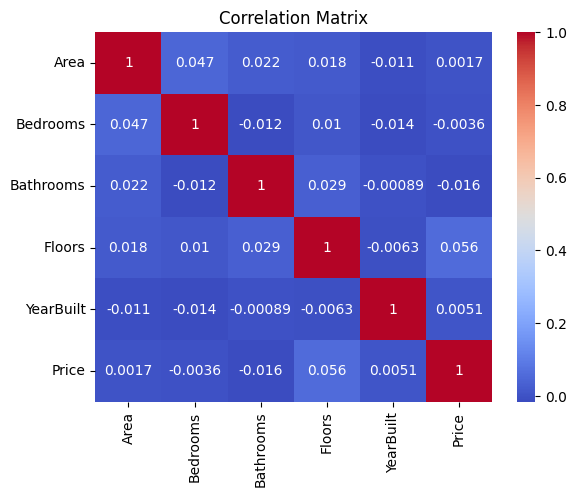

In [123]:
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()



 Scale Numerical Features
 
Applies StandardScaler to numerical features.


In [124]:
scaler = StandardScaler()
x_num = scaler.fit_transform(x[num_cols])



 Encode Categorical Features
 
Encodes categorical features using OneHotEncoder.


In [125]:
ohe = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
x_cat = ohe.fit_transform(x[cat_cols])
ohe.get_feature_names_out()


array(['Location_Downtown', 'Location_Rural', 'Location_Suburban',
       'Location_Urban', 'Condition_Excellent', 'Condition_Fair',
       'Condition_Good', 'Condition_Poor', 'Garage_No', 'Garage_Yes'],
      dtype=object)



Combines scaled numerical and encoded categorical features.


In [126]:
df1 = np.hstack([x_num, x_cat])


Splits the dataset into training and testing sets

In [127]:
xtrain, xtest, ytrain, ytest = train_test_split(df1, y, test_size=0.2, random_state=42)

Defines multiple regression models for comparison.

In [130]:
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(
        n_estimators=200, random_state=42, n_jobs=-1
    ),
    "Gradient Boosting":GradientBoostingRegressor(random_state=42)
}

Defines rules to identify underfitting, overfitting, or good fit.

In [131]:
def fit_status(train_r2, test_r2):
    if train_r2 - test_r2 > 0.15:
        return "Overfitting"
    elif train_r2 < 0.6 and test_r2 < 0.6:
        return "Underfitting"
    else:
        return "Good Fit"


Creates a summary table comparing model performance.

In [132]:
results = []

for name, model in models.items():
    model.fit(xtrain, ytrain)

    train_pred = model.predict(xtrain)
    test_pred = model.predict(xtest)

    results.append({
        "Model": name,
        "Train R2": r2_score(ytrain, train_pred),
        "Test R2": r2_score(ytest, test_pred),
        "MAE": mean_absolute_error(ytest, test_pred),
        "RMSE": mean_squared_error(ytest, test_pred),
        "Fit Status": fit_status(
            r2_score(ytrain, train_pred),
            r2_score(ytest, test_pred)
        )
    })


In [133]:
results_df = pd.DataFrame(results)
results_df


,Model,Train R2,Test R2,MAE,RMSE,Fit Status
0,Linear Regression,0.008920,0.003289,240227.554620,7.646453e+10,Underfitting
1,Ridge Regression,0.008920,0.003290,240227.786879,7.646448e+10,Underfitting
2,Decision Tree,0.999997,0.829120,29487.412174,1.310935e+10,Overfitting
3,Random Forest,0.993074,0.951409,40764.345326,3.727769e+09,Good Fit
4,Gradient Boosting,0.150728,0.097857,227575.306959,6.920958e+10,Underfitting


Visualizes test R² scores for all models.

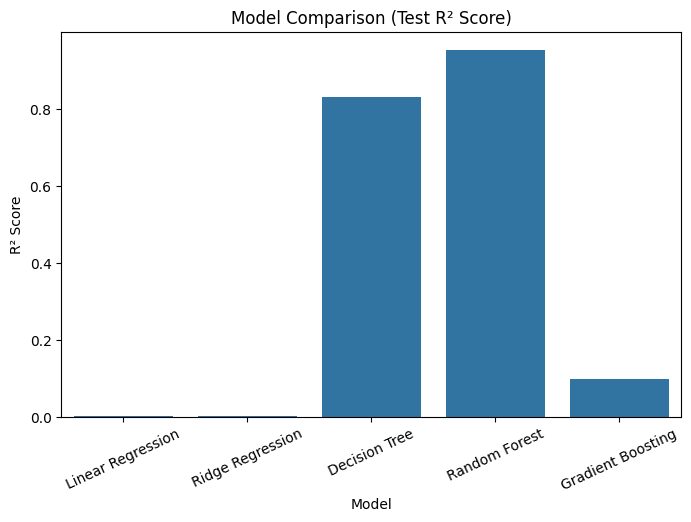

In [134]:
plt.figure(figsize=(8,5))
sns.barplot(x="Model", y="Test R2", data=results_df)
plt.title("Model Comparison (Test R² Score)")
plt.ylabel("R² Score")
plt.xticks(rotation=25)
plt.show()


Tunes the Random Forest model using randomized search.

In [137]:
from sklearn.model_selection import RandomizedSearchCV
rf = RandomForestRegressor(
    random_state=42,
    n_jobs=-1
)

param_dist = {
    "n_estimators": [300, 500, 700],
    "max_depth": [None, 20, 30, 40],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "max_features": ["sqrt", "log2"]
}

random_search = RandomizedSearchCV(
    rf,
    param_distributions=param_dist,
    n_iter=25,
    scoring="r2",
    cv=5,
    random_state=42,
    n_jobs=-1
)

random_search.fit(xtrain, ytrain)

best_rf = random_search.best_estimator_



In [138]:
best_rf = random_search.best_estimator_
print("Best Hyperparameters:", random_search.best_params_)

Best Hyperparameters: {'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 40}


In [140]:
print("Best R² Score:", random_search.best_score_)

Best R² Score: 0.930842721476808


Evaluates the tuned Random Forest model on training and test data.

In [141]:
train_pred = best_rf.predict(xtrain)
test_pred = best_rf.predict(xtest)

print("Train R²:", r2_score(ytrain, train_pred))
print("Test  R²:", r2_score(ytest, test_pred))


Train R²: 0.9963027074122556
Test  R²: 0.9701728369568051


Saves the trained model, scaler, and encoder for deployment.

In [142]:

joblib.dump(best_rf, "house_price_model.pkl")
joblib.dump(scaler, "scaler.pkl")
joblib.dump(ohe, "ohe.pkl")


['ohe.pkl']